In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-machine-learning-from-disaster/train.csv
/kaggle/input/titanic-machine-learning-from-disaster/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats
import statsmodels.api as sm


# **1**

In [3]:
#Carga los datos
#Importar datos, crear marco (df) 'passengers', imprimir cabecera e inspeccionar columnas

passengers = pd.read_csv("../input/titanic-machine-learning-from-disaster/train.csv")
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

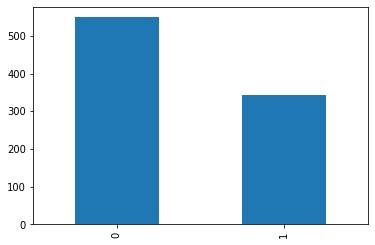

In [4]:
#murió más gente de la que sobrevivió...

passengers["Survived"].value_counts().plot(kind='bar')

<AxesSubplot:>

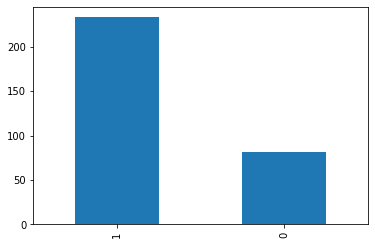

In [5]:
#Aquí quise ver más o menos cuántas mujeres sobrevivieron

passengers[passengers["Sex"]=="female"]["Survived"].value_counts().plot(kind='bar')


In [6]:
passengers.info()

#aquí quiero saber a través de Dtype qué es lo que me conviene usar
#creo que podríamos analizar rápidamente las variables de valor
#a través de la dispersión de sus valores

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Aquí revisé la dispersión de valores sustituyendo los valores en cada columna a considerar en el análisis.

passengers.Embarked.value_counts()

#Survived => solo dos valores, buen parámetro - analizar
#Pclass => buen parámetro - analizar
#Sex => pocas variables, buen parámetro - analizar
#Age => Relativamente bueno - analizar
#SibSp => Buenos valores - analizar
#Parch => Buenos valores - analizar
#Embarked => Buenos valores para analizar - analizar

""" 
*Sugerencias*
#PassengerId => demasiados valores dispersos, quitar del df
#Name => todos los valores dispersos, no analizar, quitar del df
#Ticket => Demasiados dispersos - no analizar, quitar del df
#Fare => Demasiado dispersos - no analizar, quitar del df
#Cabin => Demasiado dispersos - no analizar, quitar del df
""
"""


' \n*Sugerencias*\n#PassengerId => demasiados valores dispersos, quitar del df\n#Name => todos los valores dispersos, no analizar, quitar del df\n#Ticket => Demasiados dispersos - no analizar, quitar del df\n#Fare => Demasiado dispersos - no analizar, quitar del df\n#Cabin => Demasiado dispersos - no analizar, quitar del df\n""\n'

In [8]:
pop_nan = passengers["Age"].isna()
passengers[pop_nan].head()

#de todos modos dejé lo que pienso no analizar

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [9]:
passengers.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

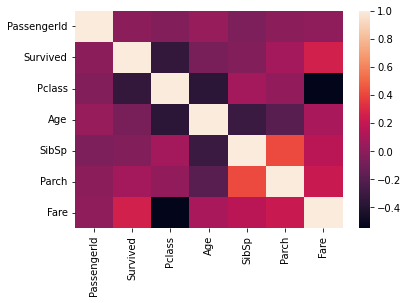

In [10]:
sns.heatmap(passengers.corr())

<AxesSubplot:>

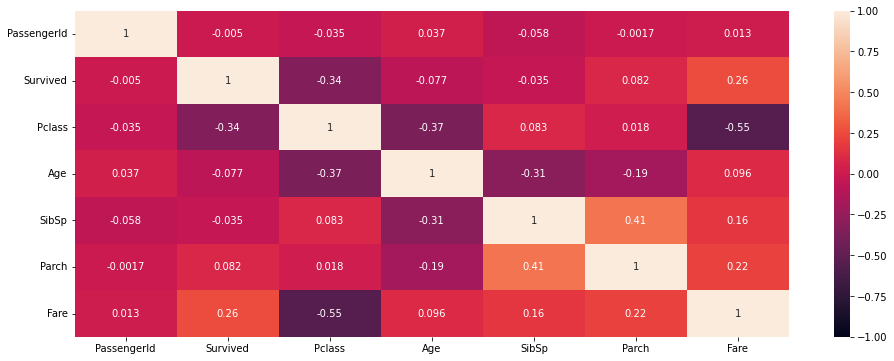

In [11]:
plt.figure(figsize=(16, 6))
sns.heatmap(passengers.corr(), vmin=-1, vmax=1, annot=True)

#Quiser ver las correlaciones, 
#hay una fuerte correlación con la gente que estaba 
#en primera clase y sobrevivió

# **2**

In [12]:
passengers['Sex'] = passengers['Sex'].map({'male': 0,'female': 1})


#también lo intenté así, pero no me salió: 
#genderMap = {"male": 0, "female": 1}
#data = [passengers]

#encontré esto en internet pero quise darle más tiempo después...
#for dataset in data:
#dataset['Sex'] = dataset['Sex'].map(genderMap)

#el dato de hasta arriba fue el que dejé al final

In [13]:
passengers['Sex'].value_counts()

#577 hombres
#314 mujeres

0    577
1    314
Name: Sex, dtype: int64

# **3**

In [14]:
passengers['Age'].values

array([22.  , 38.  , 26.  , 35.  , 35.  ,   nan, 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  ,   nan,
       31.  ,   nan, 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  ,   nan,
       19.  ,   nan,   nan, 40.  ,   nan,   nan, 66.  , 28.  , 42.  ,
         nan, 21.  , 18.  , 14.  , 40.  , 27.  ,   nan,  3.  , 19.  ,
         nan,   nan,   nan,   nan, 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  ,   nan, 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  ,   nan,   nan, 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  ,   nan,   nan,  0.83, 30.  , 22.  ,
       29.  ,   nan, 28.  , 17.  , 33.  , 16.  ,   nan, 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  ,   nan, 71.  , 23.  , 34.  ,
       34.  , 28.  ,   nan, 21.  , 33.  , 37.  , 28.  , 21.  ,   nan,
       38.  ,   nan, 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  ,   nan, 32.5 , 32.5 , 54.  , 12.  ,
         nan, 24.  ,

<AxesSubplot:>

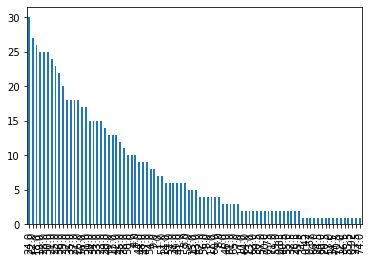

In [15]:
passengers["Age"].value_counts().plot(kind='bar')

In [16]:
mean_Age=passengers['Age'].mean()

In [17]:
passengers['Age'].fillna(value=mean_Age, inplace=True)
passengers['Age'].unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

# **4 y 5**

In [18]:
dummies = pd.get_dummies(passengers.Pclass)

In [19]:
dummies.columns = ['FirstClass', 'SecondClass', 'ThirdClass']

In [20]:
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [21]:
passengers2 = pd.concat([passengers, dummies], axis=1, join="inner")
passengers2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstClass,SecondClass,ThirdClass
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,S,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,S,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,C,1,0,0


# **6**

In [22]:
features = passengers2[["Sex","Age","FirstClass","SecondClass"]]

print(features.head())


   Sex   Age  FirstClass  SecondClass
0    0  22.0           0            0
1    1  38.0           1            0
2    1  26.0           0            0
3    1  35.0           1            0
4    0  35.0           0            0


# **7**

In [23]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [24]:
survival = passengers2[["Survived"]]

print(survival.head())

   Survived
0         0
1         1
2         1
3         1
4         0


In [25]:
print(features.shape)


(891, 4)


In [26]:
print(survival.shape)

(891, 1)


In [27]:
features_train, features_test, survival_train, survival_test = train_test_split(features,survival)

In [28]:
print(features_train.shape) 


(668, 4)


In [29]:
print(features_test.shape)

(223, 4)


In [30]:
print(survival_train.shape)


(668, 1)


In [31]:
print(survival_test.shape)

(223, 1)


# **8**

In [32]:
scaler = StandardScaler().fit(features_train)

In [33]:
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

In [34]:
print(features_train_scaled.mean(axis=0))
print(features_train_scaled.std(axis=0))

[ 6.64804206e-18  8.50949384e-17 -7.17988543e-17 -3.72290356e-17]
[1. 1. 1. 1.]


In [35]:
print(features_test_scaled.mean(axis=0))
print(features_test_scaled.std(axis=0))

[-0.01985358 -0.068974   -0.01477024  0.12008486]
[0.99375787 1.02244324 0.99104758 1.08205421]


# **9**

In [36]:
logReg = LogisticRegression()
logReg.fit(features_train_scaled,survival_train.values.ravel())

LogisticRegression()

# **10**

In [37]:
score = logReg.score(features_train_scaled,survival_train)

In [38]:
print("Training Data Score:", "{0:0.1f}".format(score*100),"%")

Training Data Score: 80.2 %


# **11**

In [39]:
score2 = logReg.score(features_test_scaled,survival_test)
print("Test Score:", "{0:0.1f}".format(score2*100),"%")

Test Score: 78.5 %


# **12**

In [40]:
print(logReg.coef_)

[[ 1.20067056 -0.37714414  0.89694857  0.48623838]]


In [41]:
print("El estudio arroja que el coeficiente mayor es el segundo, mismo que se refiere a la variable: Sexo")

El estudio arroja que el coeficiente mayor es el segundo, mismo que se refiere a la variable: Sexo


# **13**

In [42]:
Jack = np.array([0.0,20.0,0.0,0.0])
Rose = np.array([1.0,17.0,1.0,0.0])
You = np.array([0.0,44.0,0.0,1.0])

In [43]:
sample_passengers = np.vstack((Jack, Rose, You))

In [44]:
sample_passengers_scaled = scaler.fit_transform(sample_passengers)
sample_passengers_scaled

array([[-0.70710678, -0.57932412, -0.70710678, -0.70710678],
       [ 1.41421356, -0.82760589,  1.41421356, -0.70710678],
       [-0.70710678,  1.40693001, -0.70710678,  1.41421356]])

In [45]:
survival_sample = logReg.predict(sample_passengers_scaled)
print(survival_sample)

survival_proba = logReg.predict_proba(sample_passengers_scaled)
print(survival_proba)

[0 1 0]
[[0.90893744 0.09106256]
 [0.09598703 0.90401297]
 [0.88271197 0.11728803]]


In [46]:
#Bueno, lo entiendo de la siguiente manera: 
# Columna 1 - Yo hubiera tenido una probailidad del 88.47% de morir
# Columna 2 - Yo hubiera tenido un 11.52% de sobrevivir al hundimiento

#Que interesante ejercicio, nada alentador por si lo entendí bien, pero es un ejercicio muy interesante.